In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv(r'C:\Users\user\Desktop\Dacon\airline_dataset\train.csv')
data_test = pd.read_csv(r'C:\Users\user\Desktop\Dacon\airline_dataset\test.csv') # \뒤에 u가 붙으면 unicode로 인식하기 때문에 따옴표 앞에 r
print(data_train.shape)
data_train.head(1).transpose()


(3000, 24)


,0
id,1
Gender,Female
Customer Type,disloyal Customer
Age,22
Type of Travel,Business travel
Class,Eco
Flight Distance,1599
Seat comfort,3
Departure/Arrival time convenient,0
Food and drink,3


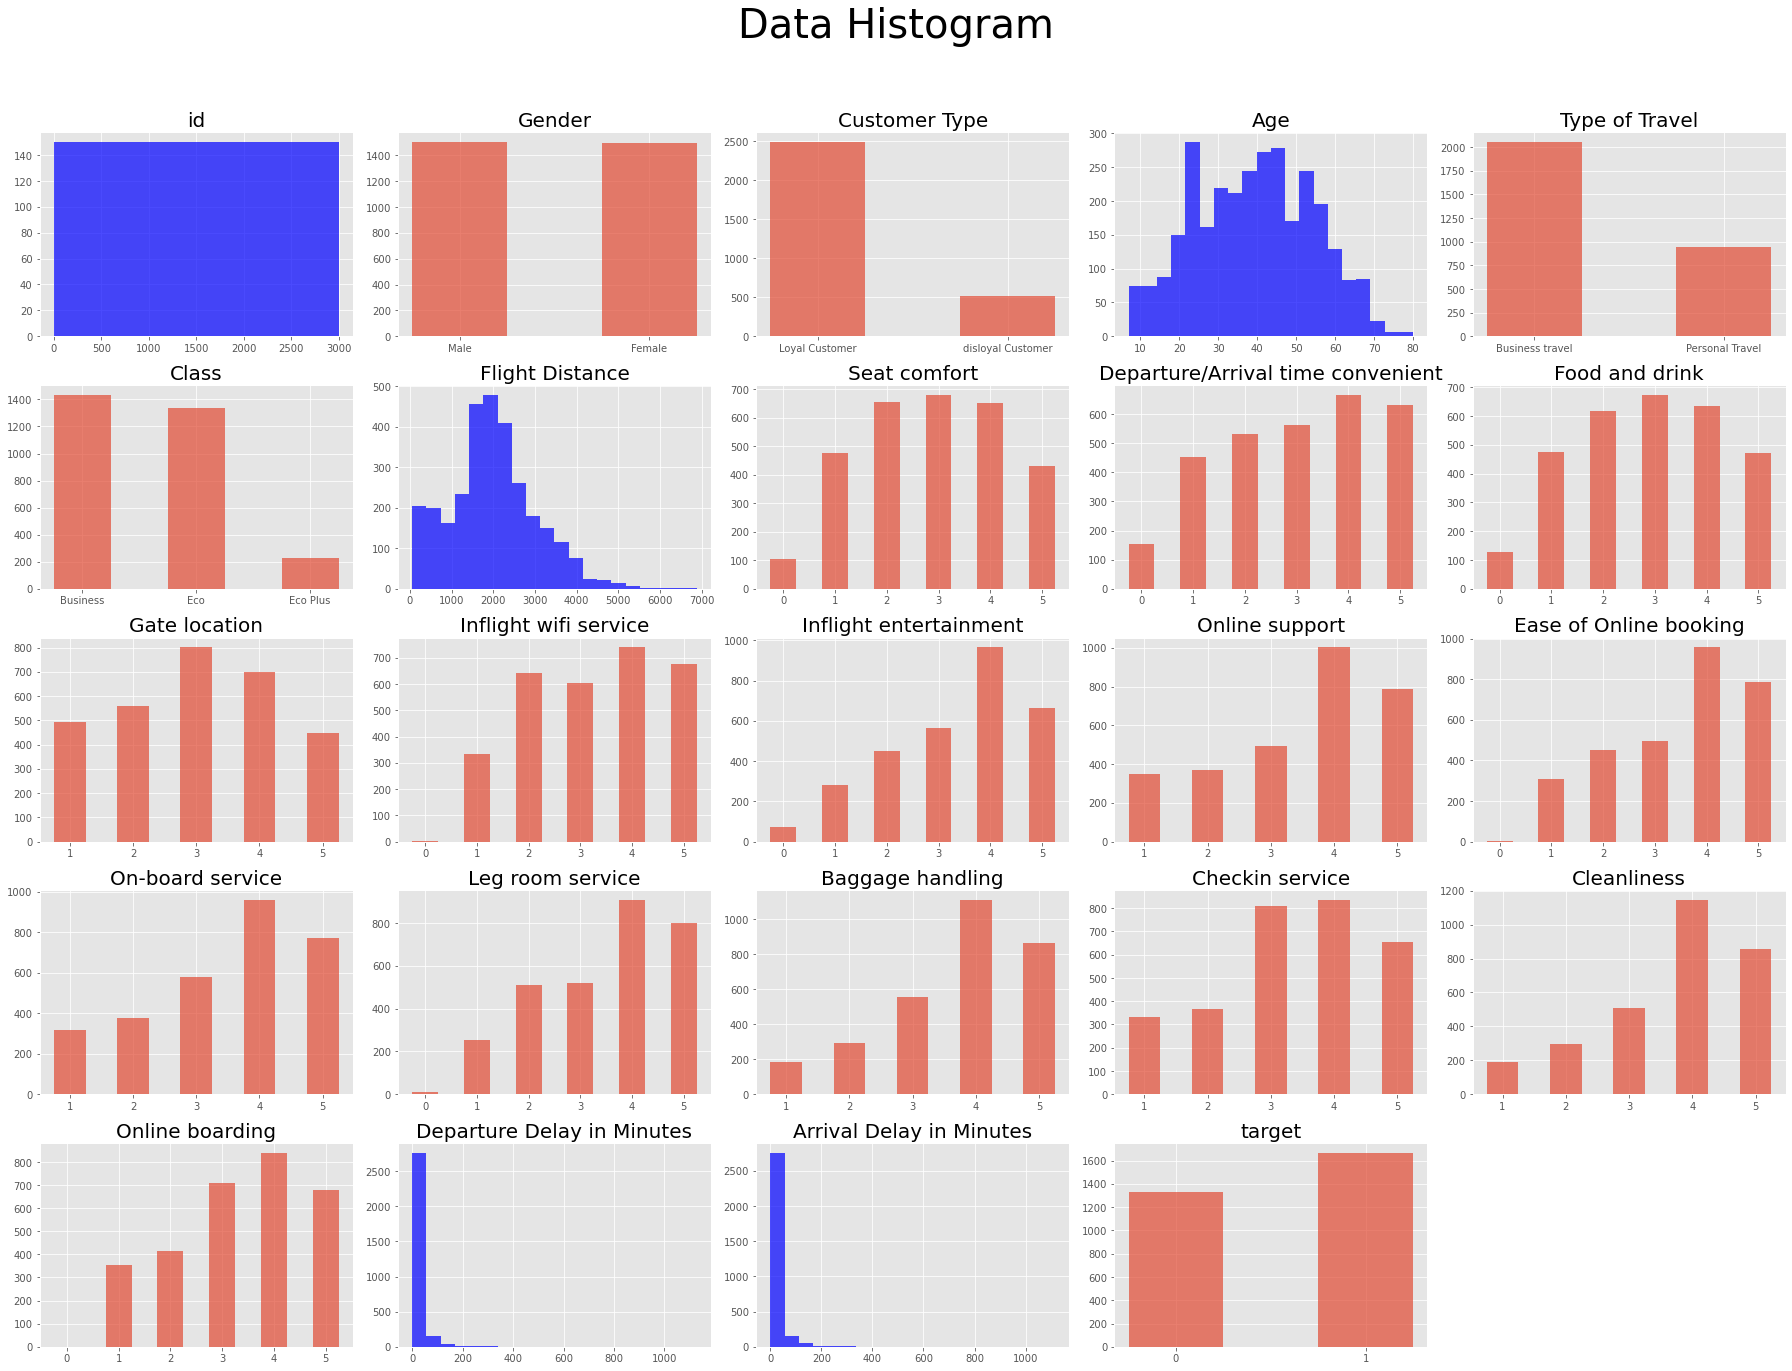

In [6]:
plt.style.use("ggplot")

#히스토그램을 사용해서 데이터의 분포
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram",fontsize=40)

cols = data_train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i],fontsize = 20)
    if len(data_train[cols[i]].unique()) > 20:
        plt.hist(data_train[cols[i]], bins = 20,color='b',alpha=0.7)
    else :
        temp = data_train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width= 0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

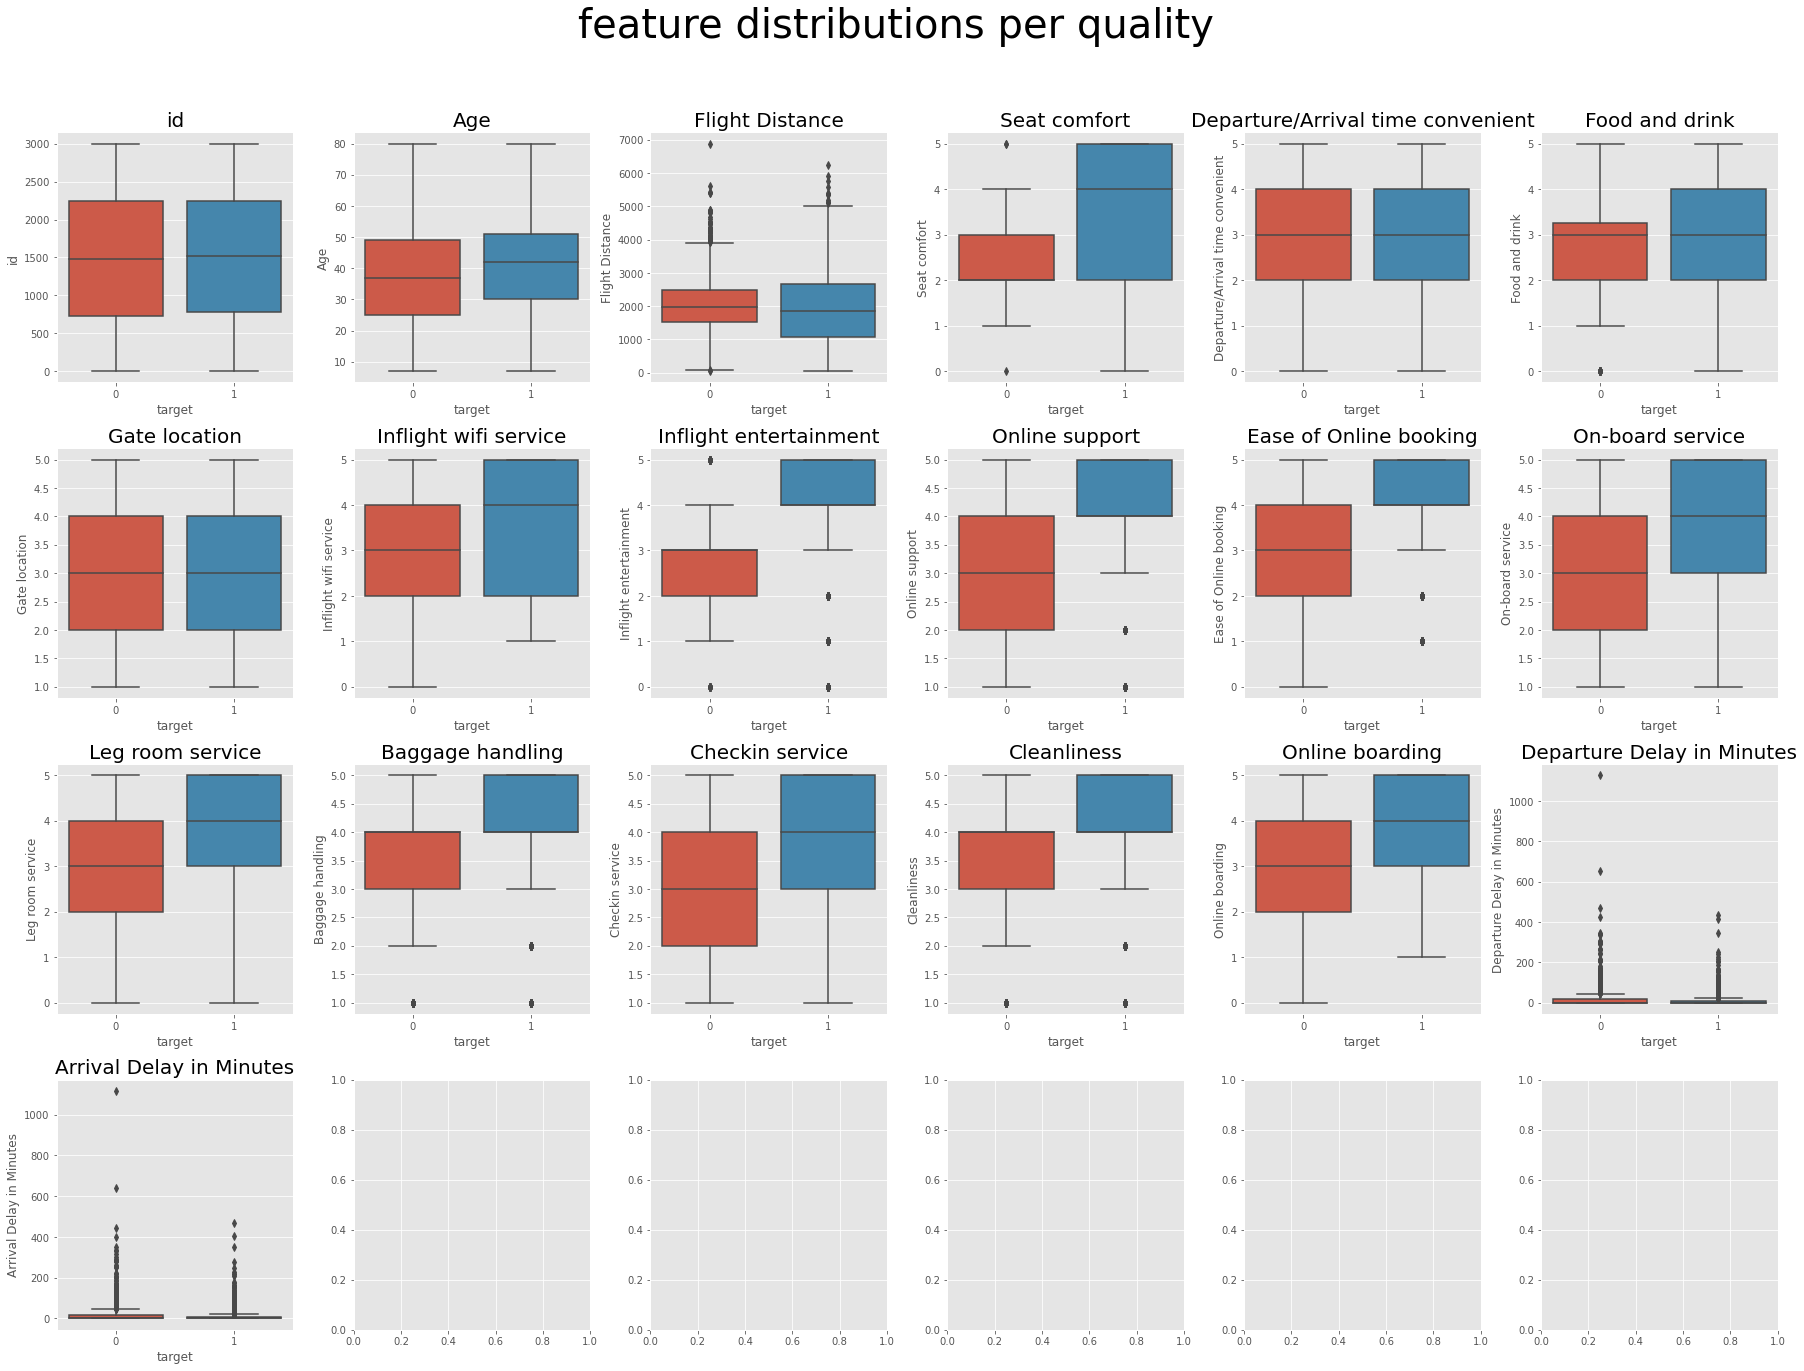

In [9]:
#수치형 데이터 분리
numeric_feature = data_train.columns[(data_train.dtypes=='int64') | (data_train.dtypes=='float')]
num_data = data_train[numeric_feature]

#boxplot
fig, axes = plt.subplots(4,6,figsize=(25,20))

fig.suptitle('feature distributions per quality', fontsize = 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x='target', y=col, ax=ax, data=num_data)
    ax.set_title(col,fontsize=20)
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [10]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

#numeric feature = 숫자형 자료
#ordinal feature = 순서형 자료 ( 매우만족 > 만족 > 보통 > 불만족 > 매우불만족)
#categorical feature = 범주형 자료 - > 남/여

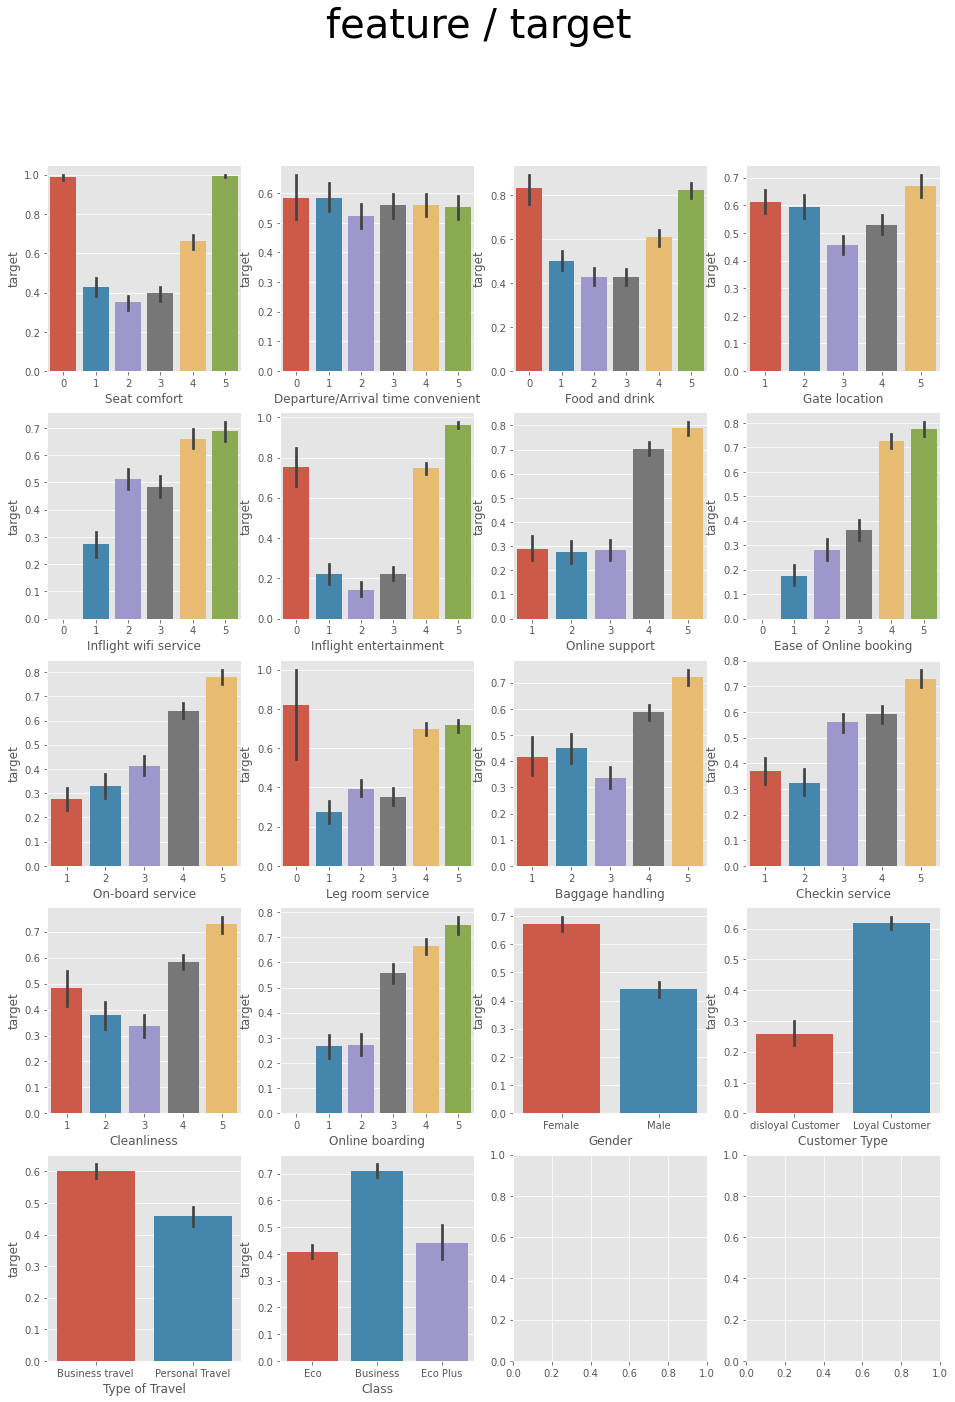

In [12]:
fig, ax = plt.subplots(5,4, figsize = (16,22))

plt.suptitle("feature / target", fontsize = 40)

feature = ordinal_feature + categorical_feature

xvalue = 0
yvalue = 0

for xstr in feature :
    sns.barplot(x = xstr, y = 'target', data = data_train, ax = ax[yvalue][xvalue])
    
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else :
        xvalue += 1

In [14]:
for xstr in numeric_feature:
    print(xstr,"Scew :", data_train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 9.190139679910239
Arrival Delay in Minutes Scew : 8.887761727831762


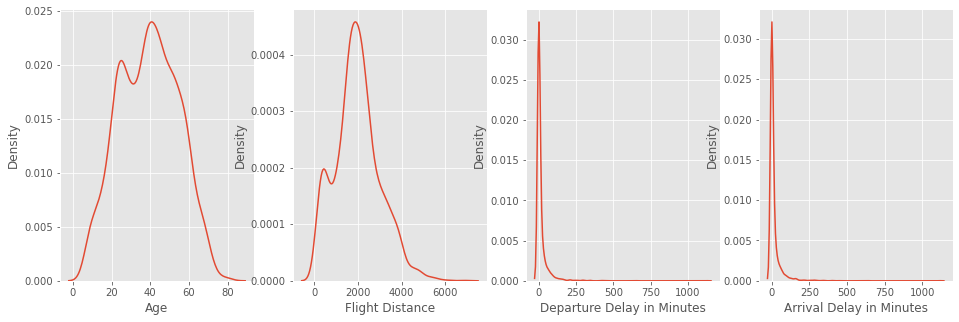

In [15]:
fig, ax = plt.subplots(1,4, figsize = (16,5))

for xint in range(4):
    sns.kdeplot(x = numeric_feature[xint], data= data_train, ax= ax[xint])

In [17]:
data_train['Departure Delay in Minutes'] = np.log1p(data_train['Departure Delay in Minutes'])
data_train['Arrival Delay in Minutes'] = np.log1p(data_train['Arrival Delay in Minutes'])


data_test['Departure Delay in Minutes'] = np.log1p(data_test['Departure Delay in Minutes'])
data_test['Arrival Delay in Minutes'] = np.log1p(data_test['Arrival Delay in Minutes'])

for xstr in numeric_feature :
    print(xstr, "Scew :", data_train[xstr].skew())

Age Scew : 0.0010456925943488839
Flight Distance Scew : 0.4509930169224059
Departure Delay in Minutes Scew : 0.9302111175258293
Arrival Delay in Minutes Scew : 0.8979015577156512


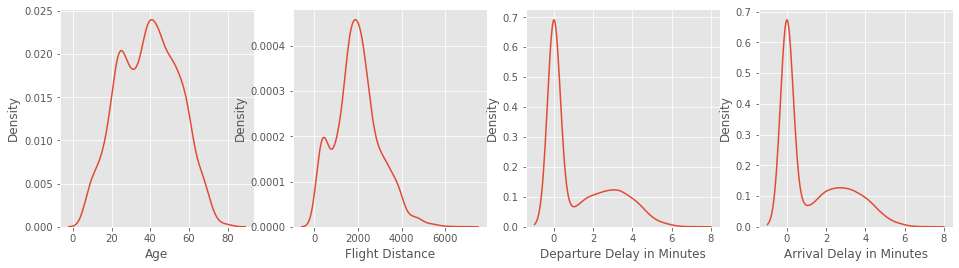

In [18]:
fig, ax = plt.subplots(1,4, figsize = (16,4))

for xint in range(4) :
    sns.kdeplot(x = numeric_feature[xint], data = data_train, ax = ax[xint])

In [19]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(data_train[data_train[feature]==0]) > 0 :
        print(feature, len(data_train[data_train[feature] == 0]))
        
print("==============================")

print("Test data missing value")
for feature in ordinal_feature:
    if len(data_test[data_test[feature]==0]) > 0 :
        print(feature, len(data_test[data_test[feature]==0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1
Test data missing value
Seat comfort 64
Departure/Arrival time convenient 90
Food and drink 80
Inflight wifi service 1
Inflight entertainment 39
Leg room service 10


In [20]:
corr_matrix = data_train.corr()
corr_matrix["Online boarding"].sort_values(ascending=False)[:5]

Online boarding           1.000000
Ease of Online booking    0.684511
Online support            0.675139
Inflight wifi service     0.632049
Inflight entertainment    0.353772
Name: Online boarding, dtype: float64

In [21]:
data_train["Ease of Online booking"][data_train["Ease of Online booking"] == 0] = 3
data_train["Online boarding"][data_train["Online boarding"]==0] = 3

In [22]:
for i in range(len(data_train)) :
    for feature in ordinal_feature:
        if data_train[feature].iloc[i] == 0:
            data_train[feature].iloc[i] == np.nan
            
            
for i in range(len(data_test)) :
    for feature in ordinal_feature :
        if data_test[feature].iloc[i] == 0 :
            data_test[feature].iloc[i] == np.nan
        

In [23]:
corr_matrix = data_train.corr()
corr_matrix["Inflight wifi service"].sort_values(ascending=False)[:5]

Inflight wifi service     1.000000
Online boarding           0.630844
Ease of Online booking    0.600852
Online support            0.563290
Inflight entertainment    0.274032
Name: Inflight wifi service, dtype: float64